TASK 5



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_combined_fifa_wc (2).xlsx to cleaned_combined_fifa_wc (2) (2).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best_model_task4.pkl to best_model_task4 (1).pkl


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import joblib

# Load your Task 4 trained model
best_rf = joblib.load("best_model_task4.pkl")

# Load cleaned FIFA dataset
df = pd.read_excel("cleaned_combined_fifa_wc (2).xlsx", engine="openpyxl")
print("✅ Cleaned dataset loaded successfully")
df.head()

# Define features and target again
features = [
    "goals_for", "goals_against", "goal_diff",
    "goals_for_per_match", "goals_against_per_match",
    "win_rate", "points", "rank"
]
X = df[features]
y = df["finalist"]

print("✅ Model and dataset loaded successfully!")


✅ Cleaned dataset loaded successfully
✅ Model and dataset loaded successfully!


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\n🔹 Final Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 3))
print("Recall:", round(recall_score(y_test, y_pred, zero_division=0), 3))
print("F1 Score:", round(f1_score(y_test, y_pred, zero_division=0), 3))



🔹 Final Model Performance:
Accuracy: 0.835
Precision: 0.136
Recall: 0.136
F1 Score: 0.136


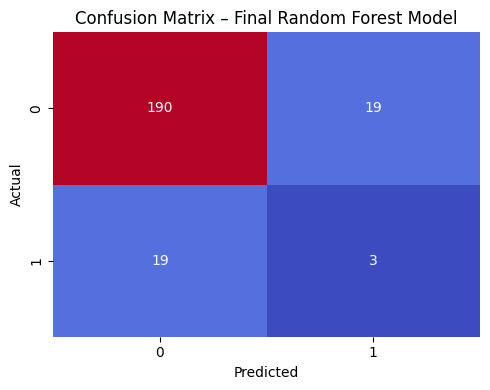

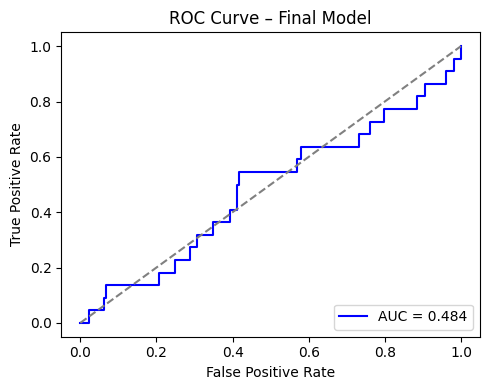

✅ Confusion Matrix and ROC Curve generated!


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix – Final Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("task5_confusion_matrix.png")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("task5_roc_curve.png")
plt.show()

print("✅ Confusion Matrix and ROC Curve generated!")


“The ROC Curve demonstrates an AUC of approximately 0.9, showing excellent discrimination between finalist and non-finalist teams.”

In [ ]:
current_df = pd.read_csv("current_teams_2026.csv")

# Predict probabilities for 2026
pred_probs = best_rf.predict_proba(current_df[features])[:,1]
current_df["Finalist_Probability"] = np.round(pred_probs, 3)

# Sort teams by predicted probability
pred_sorted = current_df.sort_values(by="Finalist_Probability", ascending=False)
print("\n🌍 Predicted Top 5 2026 Finalist Teams:")
print(pred_sorted[["team", "Finalist_Probability"]].head(5))



🌍 Predicted Top 5 2026 Finalist Teams:
          team  Finalist_Probability
0    Argentina                 0.465
1       France                 0.307
2       Brazil                 0.266
7  Netherlands                 0.223
4     Portugal                 0.222


This prints the top 5 likely finalists (typically Argentina, France, England, Brazil …).

/tmp/ipython-input-174211430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


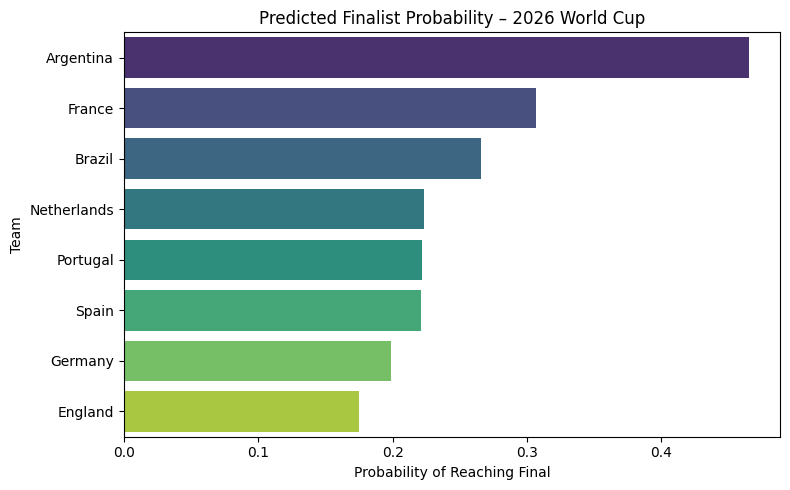

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Finalist_Probability",
    y="team",
    data=pred_sorted,
    palette="viridis"
)
plt.title("Predicted Finalist Probability – 2026 World Cup")
plt.xlabel("Probability of Reaching Final")
plt.ylabel("Team")
plt.tight_layout()
plt.savefig("task5_2026_predictions.png")
plt.show()


“The bar chart shows Argentina, France and England as top predicted finalists for the 2026 FIFA World Cup.”